<a href="https://colab.research.google.com/github/matapandax/R-for-Data-Science/blob/main/Data_Science_in_Finance_Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
install.packages('openxlsx')
library("openxlsx")

#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
str(dataCreditRating)

#Melakukan konversi kolom risk_rating menjadi factor
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating)

#Melihat struktur setelah konversi
str(dataCreditRating)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : num  4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 

In [3]:
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")
#Merubah tipe data class variable sebagai factor 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
str(dataCreditRating)

#Menghilangkan beberapa variable input dari dataset 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]
str(datafeed)

'data.frame':	900 obs. of  7 variables:
 $ kode_kontrak           : chr  "AGR-000001" "AGR-000011" "AGR-000030" "AGR-000043" ...
 $ pendapatan_setahun_juta: num  295 271 159 210 165 220 70 88 163 100 ...
 $ kpr_aktif              : chr  "YA" "YA" "TIDAK" "YA" ...
 $ durasi_pinjaman_bulan  : num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan      : num  5 5 0 3 0 5 3 3 5 6 ...
 $ rata_rata_overdue      : chr  "61 - 90 days" "61 - 90 days" "0 - 30 days" "46 - 60 days" ...
 $ risk_rating            : Factor w/ 5 levels "1","2","3","4",..: 4 4 1 3 2 1 2 2 2 2 ...
'data.frame':	900 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  48 36 12 12 36 24 36 48 48 36 ...
 $ jumlah_tanggungan    : num  5 5 0 3 0 5 3 3 5 6 ...


In [4]:
#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan porsi index acak untuk training dan testing set
set.seed(100)
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

str(input_training_set)
str(class_training_set)

'data.frame':	800 obs. of  2 variables:
 $ durasi_pinjaman_bulan: num  36 24 36 36 36 24 12 48 48 12 ...
 $ jumlah_tanggungan    : num  1 1 5 1 5 3 3 3 0 0 ...
 Factor w/ 5 levels "1","2","3","4",..: 1 1 4 1 5 3 3 3 2 1 ...


In [6]:
install.packages('C50')
library("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘reshape2’, ‘partykit’, ‘Cubist’




In [7]:
#menghasilkan dan menampilkan summary model
risk_rating_model <- C5.0(input_training_set, class_training_set)
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set)


C5.0 [Release 2.07 GPL Edition]  	Mon Aug  2 12:45:14 2021
-------------------------------

Class specified by attribute `outcome'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b): class 2
	           3   250                (c): c

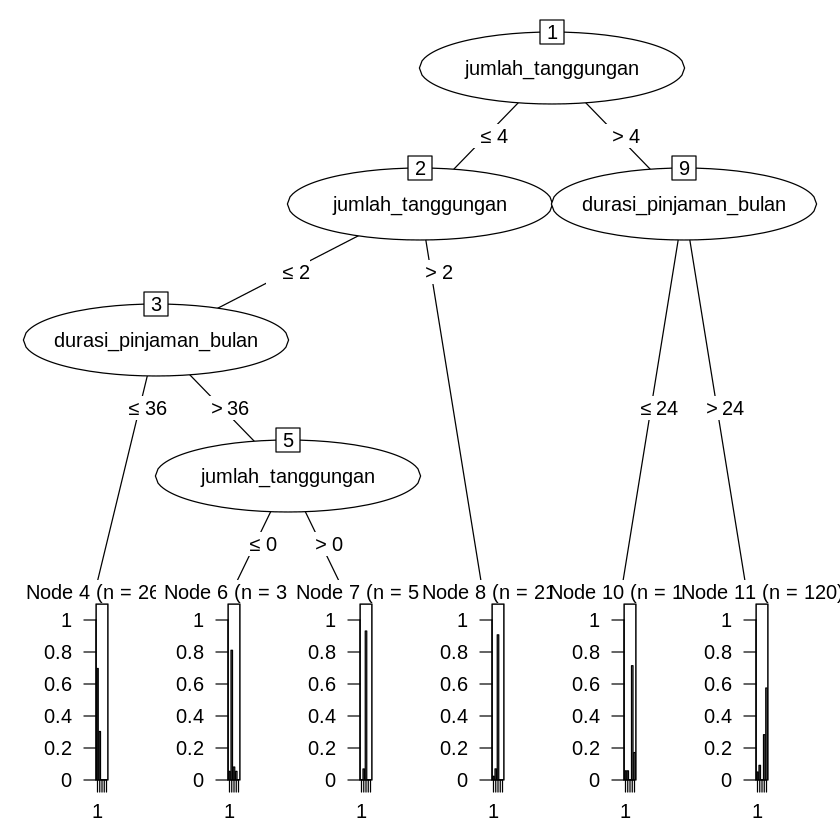

In [8]:
plot(risk_rating_model)

In [9]:
risk_rating_model <- C5.0(input_training_set, class_training_set,control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Mon Aug  2 12:47:25 2021
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: 4 (105/30)
:   durasi_pinjaman_bulan > 24: 5 (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: 3 (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: 1 (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: 2 (37/7)
            jumlah_tanggungan > 0: 3 (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   184     2     5     6     6    (a): class 1
	    80    30    19     6    11    (b)

In [10]:
#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan","kpr_aktif")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 780)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)




Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Mon Aug  2 12:49:44 2021
-------------------------------

Class specified by attribute `Risk Rating'

Read 780 cases (4 attributes) from undefined.data

Decision tree:

kpr_aktif = TIDAK:
:...durasi_pinjaman_bulan <= 36: 1 (293/103)
:   durasi_pinjaman_bulan > 36: 2 (47/7)
kpr_aktif = YA:
:...jumlah_tanggungan <= 4: 3 (247/4)
    jumlah_tanggungan > 4:
    :...durasi_pinjaman_bulan <= 24: 4 (91/17)
        durasi_pinjaman_bulan > 24: 5 (102/34)


Evaluation on training data (780 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  165(21.2%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	   190     5     2                (a): class 1
	   101    40                 1    (b): class 2
	     1     1   243                (c): class 3
	                 2    74    33    

**Merubah Label Class Variable**

In [16]:
#Mempersiapkan data
dataCreditRating <- read.xlsx(xlsxFile = "https://storage.googleapis.com/dqlab-dataset/credit_scoring_dqlab.xlsx")

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "1"]  <-  "satu"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "2"]  <-  "dua"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "3"]  <-  "tiga"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "4"]  <-  "empat"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "5"]  <-  "lima"
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]


#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)

#Mempersiapkan class dan input variables 
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "1"]  <-  "satu"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "2"]  <-  "dua"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "3"]  <-  "tiga"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "4"]  <-  "empat"
dataCreditRating$risk_rating[dataCreditRating$risk_rating == "5"]  <-  "lima"
dataCreditRating$risk_rating <- as.factor(dataCreditRating$risk_rating) 
input_columns <- c("durasi_pinjaman_bulan", "jumlah_tanggungan")
datafeed <- dataCreditRating[ , input_columns ]

#Mempersiapkan training dan testing set
set.seed(100) #untuk menyeragamkan hasil random antar tiap komputer
indeks_training_set <- sample(900, 800)

#Membuat dan menampilkan training set dan testing set
input_training_set <- datafeed[indeks_training_set,]
class_training_set <- dataCreditRating[indeks_training_set,]$risk_rating
input_testing_set <- datafeed[-indeks_training_set,]

#menghasilkan model
risk_rating_model <- C5.0(input_training_set, class_training_set, control = C5.0Control(label="Risk Rating"))
summary(risk_rating_model)




Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Mon Aug  2 12:56:16 2021
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    3


Call:
C5.0.default(x = input_training_set, y = class_training_set, control
 = C5.0Control(label = "Risk Rating"))


C5.0 [Release 2.07 GPL Edition]  	Mon Aug  2 12:56:16 2021
-------------------------------

Class specified by attribute `Risk Rating'

Read 800 cases (3 attributes) from undefined.data

Decision tree:

jumlah_tanggungan > 4:
:...durasi_pinjaman_bulan <= 24: empat (105/30)
:   durasi_pinjaman_bulan > 24: lima (120/51)
jumlah_tanggungan <= 4:
:...jumlah_tanggungan > 2: tiga (216/20)
    jumlah_tanggungan <= 2:
    :...durasi_pinjaman_bulan <= 36: satu (264/80)
        durasi_pinjaman_bulan > 36:
        :...jumlah_tanggungan <= 0: dua (37/7)
            jumlah_tanggungan > 0: tiga (58/4)


Evaluation on training data (800 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6  192(24.0%)   <<


	   (a)   (b)   (c)   (d)   (e)    <-classified as
	  ----  ----  ----  ----  ----
	    30     6    11    80    19    (a): class dua
	     2    75    3

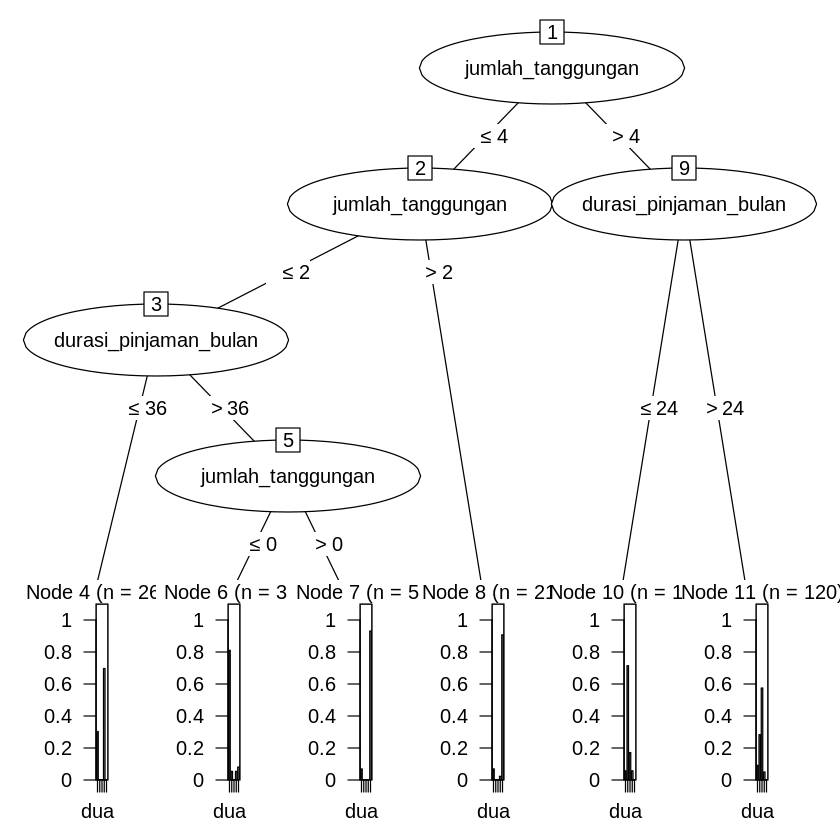

In [17]:
plot(risk_rating_model)